In [1]:
from IPython.display import display, HTML

css = """
<style>
    .jp-Notebook .jp-Cell {
        margin-bottom: 16px !important;
    }
</style>
"""

display(HTML(css))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation

In [3]:
%matplotlib inline

# to turn it to inline
# to get the widget to control graph
# %matplotlib widget

In [3]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [41]:
nulldes = df[df['Description'].isna()]
nulldes.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [48]:
# Here it seems that most of desc = Nan is coming from these feature observations

nulldes["CustomerID"].unique(), nulldes["UnitPrice"].unique(), nulldes["Country"].unique()

(array([nan]), array([0.]), array(['United Kingdom'], dtype=object))

#### StockCode as UID for product description

In [49]:
# confidence about if stock code refers to unique identification number for each product

grouped = df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)
print(grouped)
print("\n========================\n")
print(grouped.unique())

StockCode
20713     8
23084     7
21830     6
85175     6
21181     5
         ..
72800F    0
20825     0
21330     0
72781     0
37477B    0
Name: Description, Length: 4070, dtype: int64


[8 7 6 5 4 3 2 1 0]


In [47]:
# Here i have selected subset of real dataset as i feel like these features observation
# is what i am going to make inference from. But again this is not the total picture as
# shown below `some stuff that i can't resolve currently`

real_sales = df[(df["UnitPrice"] > 0) & (df["Quantity"] > 0)]
real_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [50]:
# follows from above where all nan desc have feature unitprice = 0

real_sales[real_sales["Description"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [51]:
# Now taking all stockcode, will look at all description having same stockcode
# first checking how many description have same stockcode

rsscd = real_sales.groupby("StockCode")["Description"].nunique().sort_values(ascending=False)
rsscd

StockCode
23196    4
23236    4
23396    3
23126    3
23535    3
        ..
22494    1
22495    1
22496    1
22497    1
m        1
Name: Description, Length: 3922, dtype: int64

In [52]:
# well count = 1 means unique description

rsscd[rsscd > 1].unique()

array([4, 3, 2])

In [53]:
# Here i printed some description having same stock code and observed that
# all descriptions are similar meaning pointing to same product

count = 4
print(rsscd[rsscd == count])

print("\n=======================\n")

for sc in rsscd[rsscd == count].index:
    print(sc)
    print(real_sales[real_sales["StockCode"] == sc]["Description"].unique())

StockCode
23196    4
23236    4
Name: Description, dtype: int64


23196
['RETRO LEAVES MAGNETIC NOTEPAD' 'RETO LEAVES MAGNETIC SHOPPING LIST'
 'LEAVES MAGNETIC  SHOPPING LIST' 'VINTAGE LEAF MAGNETIC NOTEPAD']
23236
['DOILEY STORAGE TIN' 'DOILEY BISCUIT TIN' 'STORAGE TIN VINTAGE DOILEY '
 'STORAGE TIN VINTAGE DOILY ']


In [137]:
rsscd = df.groupby("StockCode")["Description"].nunique().sort_values(ascending=False)
rsscd

StockCode
20713     8
23084     7
21830     6
85175     6
21181     5
         ..
72800F    0
20825     0
21330     0
72781     0
37477B    0
Name: Description, Length: 4070, dtype: int64

In [139]:
# will skip 0 as these don't have description as grouped by stockcode
rsscd.unique()

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

In [145]:
# Here i printed some description having same stock code and observed that
# all descriptions are similar meaning pointing to same product

count = 8

print(df[df["Description"] == "wrongly coded 23343"])

for sc in rsscd[rsscd == count].index:
    print(sc)
    print(df[df["StockCode"] == sc]["Description"].unique())

       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
422750    573114     20713  wrongly coded 23343      1000 2011-10-27 15:36:00   

        UnitPrice  CustomerID         Country  
422750        0.0         NaN  United Kingdom  
20713
['JUMBO BAG OWLS' nan 'wrongly marked. 23343 in box' 'wrongly coded-23343'
 'found' 'Found' 'wrongly marked 23343' 'Marked as 23343'
 'wrongly coded 23343']


This with it above i can safely say that each product uid is stockcode 

In [54]:
# Thus creating this function which looks for similar description by heuristic that
# similar description will have common keywords. Num = 2 is from looking at desc
# individually

def matching_description(l: list):
    keywords = set(l[0].split(" "))
    for desc in l[1:]:
        score = 0
        for keys in desc.split(" "):
            if keys in keywords:
                score += 1
        if score < 2:
            return False
    return True

count = 2

for sc in rsscd[rsscd == count].index:
    if matching_description(real_sales[real_sales["StockCode"] == sc]["Description"].unique()) == False:
        print(sc)
        print(real_sales[real_sales["StockCode"] == sc]["Description"].unique())

84906
["PINK B'FLY C/COVER W BOBBLES" 'PINK BUTTERFLY CUSHION COVER']
84247E
['PACK/12 XMAS FUN CARD' 'PACK OF 12 CHRISTMAS FUN CARDS']
79030D
['TUMBLER, BAROQUE' 'TUMBLER BAROQUE']
16156L
['WRAP, CAROUSEL' 'WRAP CAROUSEL']


I can't confidently say that each stockcode acts as uid as explained in below third point but for
real sales. I can use it as product UID.

#### Data duplication issue

- Data Duplication or Not

I can't reason whether to remove those duplicated data or not because there are majority of duplicated data
with quantity = 1 thus i am thinking it is one + one offer or something. But there are also records where
quantity exceeds 1 like 42 or something. Here i am at loss, is it really promotionals or data entry error.

In [35]:
duplication = real_sales[real_sales.duplicated(keep=False)].copy()
duplication["StockCode"] = duplication["StockCode"].apply(str)
duplication.sort_values(by="StockCode")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
139206,548309,10120,DOGGY RUBBER,1,2011-03-30 12:02:00,0.21,16657.0,United Kingdom
139262,548309,10120,DOGGY RUBBER,1,2011-03-30 12:02:00,0.21,16657.0,United Kingdom
248501,558860,10125,MINI FUNKY DESIGN TAPES,1,2011-07-04 12:18:00,0.85,17975.0,United Kingdom
248503,558860,10125,MINI FUNKY DESIGN TAPES,1,2011-07-04 12:18:00,0.85,17975.0,United Kingdom
239419,558049,10133,COLOURING PENCILS BROWN TUBE,1,2011-06-24 14:16:00,0.42,15850.0,United Kingdom
...,...,...,...,...,...,...,...,...
414142,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom
414141,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom
414140,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom
414143,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom


In [85]:
# Like here i am checking if all datas have same quantity or different and there are different rows

quantity_check = duplication.groupby(["InvoiceNo", "StockCode"])["Quantity"].agg(lambda x: list(set(x))).reset_index()
quantity_check["SameQuantity"] = quantity_check["Quantity"].apply(lambda x: len(x) == 1)
print(quantity_check)

      InvoiceNo StockCode Quantity  SameQuantity
0        536409     21866      [1]          True
1        536409     22111      [1]          True
2        536409     22866      [1]          True
3        536409     22900      [1]          True
4        536412     21448   [1, 2]         False
...         ...       ...      ...           ...
4826     581538     22694      [1]          True
4827     581538     22992      [1]          True
4828     581538     23275      [1]          True
4829     581538     23318      [1]          True
4830     581538     23343      [1]          True

[4831 rows x 4 columns]


In [61]:
# this proves that duplicated will not give rows with all duplication

quantity_check[quantity_check["SameQuantity"] == False]

,InvoiceNo,StockCode,Quantity,SameQuantity
4,536412,21448,"[1, 2]",False
163,537202,22147,"[1, 2]",False
308,538313,22727,"[1, 2]",False
710,543277,21034,"[1, 2]",False
1135,548308,21086,"[1, 2]",False
1831,558751,22063,"[1, 2]",False
2471,567462,21977,"[1, 2]",False
2891,571039,21034,"[1, 3]",False
3676,575753,47422,"[1, 4]",False
4443,579124,47469,"[1, 2]",False


In [84]:
# But here i see that only quantity is different, rest are same. Thus questioning is there
# error while recording data where data is repeated more than one time

filter_value = quantity_check[quantity_check["SameQuantity"] == False][["InvoiceNo", "StockCode"]].reset_index(drop=True)

duplication.merge(filter_value, on=["InvoiceNo", "StockCode"], how="inner").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
1,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
2,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
3,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
4,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


**I am so wrong with above duplication**

Where i have stated that `duplicated(keep=False)` will give rows which doesn't need to match all features but i am wrong.
Bro the row with quantity = 2 and row with quantity = 1 are two different duplicated it registered. Here above since
quantity = 2 has repeated 3 thus it is counted as duplicated and thus it is counted as duplicated excluding row
with quantity = 1, which has it's duplication as shown above.

But i can't seem to make choice whether to keep those duplication or not. Let' keep it for now.

#### Outliers 

In [99]:
# Looking at outliers

real_sales[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [89]:
real_sales["Quantity"].quantile(0.99)

100.0

In [90]:
real_sales["Quantity"].max()

80995

In [94]:
real_sales[real_sales["Quantity"] == 80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [95]:
real_sales["UnitPrice"].quantile(0.99)

16.98

In [98]:
real_sales[real_sales["UnitPrice"] > 13541]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


So it seems that most of the data are in small ticket small quantity and there are some other data
like above AMAZON FEE which doesn't relate to retail store. Let's keep this data and when trying to
find best performing product, will remove manually those stuff. Rather than wrangling the data currently.

But it seems hard to ignore them, as for best performing country, these will add ons. But again there is factor
of number which is these are small but the value is high here. Is this product legit product of store?
Another can't seem to resolve!!

#### Basic Sales Analysis

In [7]:
real_sales = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
stock_series = real_sales["StockCode"].astype(str)
real_sales = real_sales[stock_series.str.contains(r'\d', na=False)]

# and excluding business internals like postage and everything cause that is not a product
# otherwise StockCode == "DOT" has 686 unique UnitPrice

In [8]:
# total sales by country

# this year most product is sold to United Kingdom and looking at below return rates by country
# United Kingdom is lower, damm this company is doing good in this country
real_sales.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    4654324
Netherlands        200258
EIRE               147168
Germany            118139
France             111272
Australia           83900
Sweden              36042
Switzerland         30527
Spain               27731
Japan               26016
Name: Quantity, dtype: int64

In [9]:
# total revenue

'${:,.2f}'.format((df["Quantity"] * df["UnitPrice"]).sum().item())

'$9,747,747.93'

In [16]:
# monthly sales trends

real_sales['TotalPrice'] = real_sales["Quantity"] * real_sales["UnitPrice"]
real_sales.set_index('InvoiceDate').resample("ME")['TotalPrice'].sum()

InvoiceDate
2010-12-31     778608.36
2011-01-31     672192.41
2011-02-28     509151.42
2011-03-31     691890.92
2011-04-30     516703.21
2011-05-31     741675.55
2011-06-30     739426.88
2011-07-31     689873.19
2011-08-31     725985.42
2011-09-30    1031393.78
2011-10-31    1107383.20
2011-11-30    1458892.24
2011-12-31     615698.31
Freq: ME, Name: TotalPrice, dtype: float64

In [18]:
# customer analysis

real_sales["CustomerID"].nunique()

4334

In [30]:
# per customer revenue generated

print(real_sales.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10))

# taking returns into account
stock_series = df["StockCode"].astype(str)
df_filtered = df[stock_series.str.contains(r'\d', na=False)].copy(deep=True)
df_filtered["TotalPrice"] = df_filtered["Quantity"] * df_filtered["UnitPrice"]

print("\n")
print(df_filtered.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10))

CustomerID
14646.0    279138.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    140450.72
12415.0    124564.53
14156.0    117379.63
17511.0     91062.38
12346.0     77183.60
16029.0     72882.09
Name: TotalPrice, dtype: float64


CustomerID
14646.0    278778.02
18102.0    259657.30
17450.0    189735.53
14911.0    133007.13
12415.0    123638.18
14156.0    114505.32
17511.0     88138.20
16684.0     65920.12
13694.0     62924.10
15311.0     59419.34
Name: TotalPrice, dtype: float64


In [34]:
# which day of week has highest sales

real_sales["InvoiceDate"].dt.dayofweek.value_counts()

InvoiceDate
3    100595
1     99002
0     92720
2     91938
4     79867
6     63784
Name: count, dtype: int64

#### Plan 

3. Is removal or not changes the overall analysis, just remove or not remove and see. Do similar to duplicated, see
   if removal of duplication changes the result or not
5. Lastly why am i doing this, just do analysis on original as -ve quantity and -ve unit price
   means money is being used and this record is added to match the overall financial statement 

#### Unit Price Changes

In [6]:
# looking at this cause rest irrelevant

real_sales = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
stock_series = real_sales["StockCode"].astype(str)
real_sales = real_sales[stock_series.str.contains(r'\d', na=False)]

# and excluding business internals like postage and everything cause that is not a product
# otherwise StockCode == "DOT" has 686 unique UnitPrice

In [7]:
diffup = real_sales.groupby('StockCode')['UnitPrice'].nunique().sort_values(ascending=False)

In [8]:
diffup.unique()

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [9]:
diffup[diffup == 15]

StockCode
79321    15
Name: UnitPrice, dtype: int64

In [10]:
# whatever hypothesis i am writing below, continue to observe for other product also
# from looking at this, my hypothesis of unit price being different for different country fails
# this product price is varying not with time as just few hour difference increase and decrease
# there is no monotonicity
check = real_sales[real_sales["StockCode"] == 79321]
check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom
713,536425,79321,CHILLI LIGHTS,8,2010-12-01 12:08:00,4.95,13758.0,United Kingdom
1745,536544,79321,CHILLI LIGHTS,1,2010-12-01 14:32:00,10.17,NaN,United Kingdom
2095,536557,79321,CHILLI LIGHTS,24,2010-12-01 14:41:00,4.25,17841.0,United Kingdom
2112,536560,79321,CHILLI LIGHTS,48,2010-12-01 15:00:00,4.25,13093.0,United Kingdom
...,...,...,...,...,...,...,...,...
538726,581413,79321,CHILLI LIGHTS,4,2011-12-08 14:39:00,5.75,16833.0,United Kingdom
538850,581419,79321,CHILLI LIGHTS,12,2011-12-08 15:03:00,5.75,15484.0,United Kingdom
540542,581492,79321,CHILLI LIGHTS,1,2011-12-09 10:03:00,12.46,NaN,United Kingdom
541513,581498,79321,CHILLI LIGHTS,10,2011-12-09 10:26:00,12.46,NaN,United Kingdom


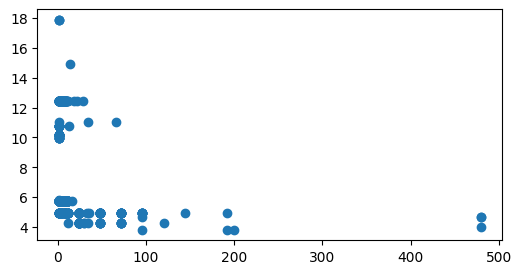

In [25]:
# But i feel like there is relation with quantity and unit price maybe datetime (inflation not confident)

# let's first draw the scatter plot
k = check[["Quantity", "UnitPrice"]]
plt.figure(figsize=(6, 3))
plt.scatter(k["Quantity"], k["UnitPrice"])
plt.show()

# damm, this hypothesis kind of works but there are cases where lower unit price for lower quantity

In [ ]:
# let's look at 3d scatter plot with date as feature
# thus again the hypothesis that unit price low with quantity high fails even accounting for datetime

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(check["Quantity"], check["UnitPrice"], check["InvoiceDate"].dt.strftime('%s').astype(int))

ax.set_xlabel('Quantity')
ax.set_ylabel('Unit Price')
ax.set_zlabel('Date Time')

plt.show()

In [46]:
k = real_sales[real_sales["StockCode"].isin(diffup[diffup == 2].index)]
mi = k.groupby("StockCode")["UnitPrice"].apply(lambda x: x.is_monotonic_increasing or x.is_monotonic_decreasing)

print(mi)
print(mi.value_counts())

StockCode
10080            True
16014           False
16015           False
16016           False
16045            True
                ...  
DCGS0003         True
gift_0001_20     True
gift_0001_30     True
gift_0001_40     True
gift_0001_50     True
Name: UnitPrice, Length: 524, dtype: bool
UnitPrice
False    298
True     226
Name: count, dtype: int64


In [48]:
real_sales[real_sales["StockCode"] == 10080]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
103332,545060,10080,GROOVY CACTUS INFLATABLE,2,2011-02-27 13:47:00,0.85,15547.0,United Kingdom
234546,557568,10080,GROOVY CACTUS INFLATABLE,48,2011-06-21 10:40:00,0.39,17629.0,United Kingdom
245552,558614,10080,GROOVY CACTUS INFLATABLE,12,2011-06-30 15:56:00,0.39,NaN,United Kingdom
249766,558911,10080,GROOVY CACTUS INFLATABLE,12,2011-07-05 09:23:00,0.39,14189.0,United Kingdom
279438,561322,10080,GROOVY CACTUS INFLATABLE,12,2011-07-26 13:03:00,0.39,15203.0,United Kingdom
285791,561925,10080,GROOVY CACTUS INFLATABLE,12,2011-08-01 12:28:00,0.39,16551.0,United Kingdom
286814,562044,10080,GROOVY CACTUS INFLATABLE,24,2011-08-02 10:24:00,0.39,16607.0,United Kingdom
287990,562127,10080,GROOVY CACTUS INFLATABLE,12,2011-08-03 08:21:00,0.39,13717.0,United Kingdom
309221,564065,10080,GROOVY CACTUS INFLATABLE,12,2011-08-22 15:05:00,0.39,15150.0,United Kingdom
327182,565618,10080,GROOVY CACTUS INFLATABLE,12,2011-09-05 15:40:00,0.39,15974.0,United Kingdom


In [49]:
k = real_sales[real_sales["StockCode"].isin(diffup[diffup == 3].index)]
mi = k.groupby("StockCode")["UnitPrice"].apply(lambda x: x.is_monotonic_increasing or x.is_monotonic_decreasing)

print(mi)
print(mi.value_counts())

StockCode
10002     False
16008     False
20657     False
20658     False
20661     False
          ...  
90214F     True
90214O    False
90214T     True
90214W     True
90214Z     True
Name: UnitPrice, Length: 831, dtype: bool
UnitPrice
False    808
True      23
Name: count, dtype: int64


This shows that unit price changes isn't dependent on datetime as there is no monotonicity  
Also with this, total amount of quantity before unit price and quantity don't affect unit price  
Then why the unit price changes??

Later exploration

#### Date Aspect 

In [18]:
# let's understand date aspect

dates = df["InvoiceDate"]
print(dates)
print("\n")

# checking if date is sorted or not
print("Starting date: ", dates.iloc[0])
print("Is Monotonic Increasing: ", dates.is_monotonic_increasing)
print("Ending date: ", dates.iloc[-1])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]


Starting date:  2010-12-01 08:26:00
Is Monotonic Increasing:  True
Ending date:  2011-12-09 12:50:00


In [69]:
# From above, we see that we have 1 year of data
# let's look at individual dates, and then get a mean of how many transc is record per day

per_day = df.groupby(df["InvoiceDate"].dt.date).size()
print(per_day)

# thus on average we got about 2000 trancx per day
print("\nMean Transx Count: ", per_day.mean())

InvoiceDate
2010-12-01    3108
2010-12-02    2109
2010-12-03    2202
2010-12-05    2725
2010-12-06    3878
              ... 
2011-12-05    5331
2011-12-06    3365
2011-12-07    2438
2011-12-08    4940
2011-12-09    1632
Length: 305, dtype: int64

Mean Transx Count:  1776.7508196721312


In [68]:
# let's look at per month data
# first let's understand how many days the transx is recorded

days_per_month = pd.DataFrame({"Month": dates.dt.to_period('M'), "Date": dates.dt.date}).groupby("Month")["Date"].nunique()
print(days_per_month)
print("\n")

# can use this to show growth per month
# amt_tranx_per_month = dates.dt.to_period('M').value_counts()
# print(amt_tranx_per_month)
# print("\n")

per_month = df.groupby(df["InvoiceDate"].dt.to_period('M')).size()
print(per_month)
print(per_month.sum() == len(df))  # just checking if above works properly or not

Month
2010-12    20
2011-01    24
2011-02    24
2011-03    27
2011-04    21
2011-05    25
2011-06    26
2011-07    26
2011-08    26
2011-09    26
2011-10    26
2011-11    26
2011-12     8
Freq: M, Name: Date, dtype: int64


InvoiceDate
2010-12    42481
2011-01    35147
2011-02    27707
2011-03    36748
2011-04    29916
2011-05    37030
2011-06    36874
2011-07    39518
2011-08    35284
2011-09    50226
2011-10    60742
2011-11    84711
2011-12    25525
Freq: M, dtype: int64
True


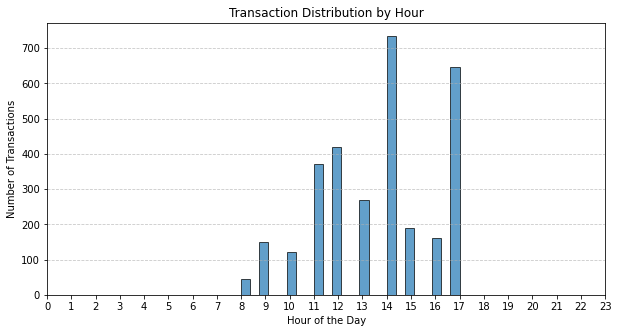

In [99]:
# Now let's go for each day, and check the timing where sales occured
# like per month, per weekdays

# first day plot
first_day = dates[dates.dt.date == pd.to_datetime("2010-12-01").date()].dt.hour

plt.figure(figsize=(10, 5))
plt.hist(first_day, bins=24, edgecolor='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Distribution by Hour')
plt.xticks(range(24))  # Set x-axis to show all 24 hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

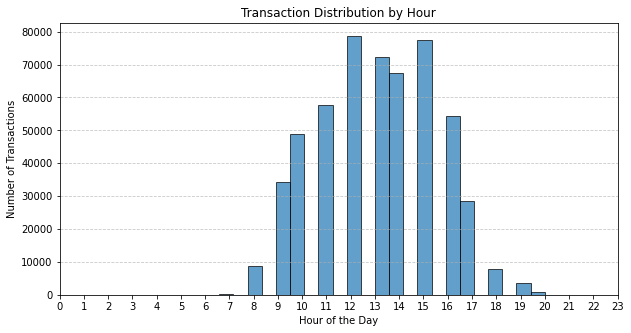

In [108]:
# Total rows

plt.figure(figsize=(10, 5))
plt.hist(dates.dt.hour, bins=24, edgecolor='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Distribution by Hour')
plt.xticks(range(24))  # Set x-axis to show all 24 hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

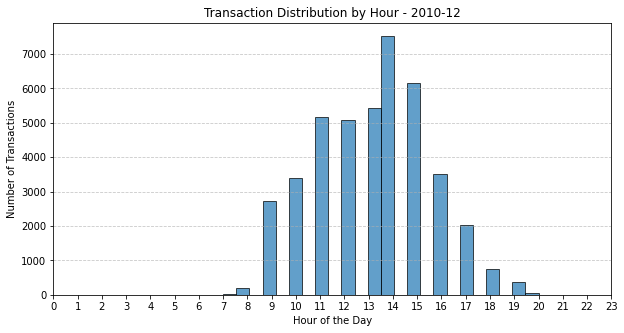

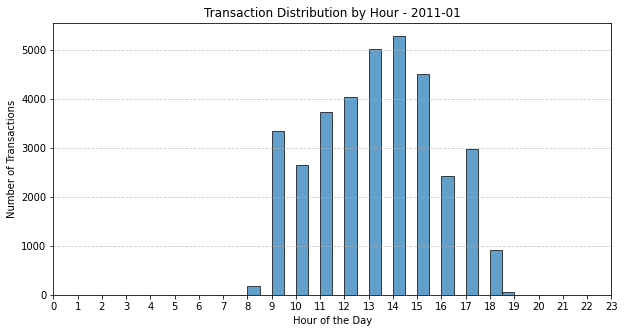

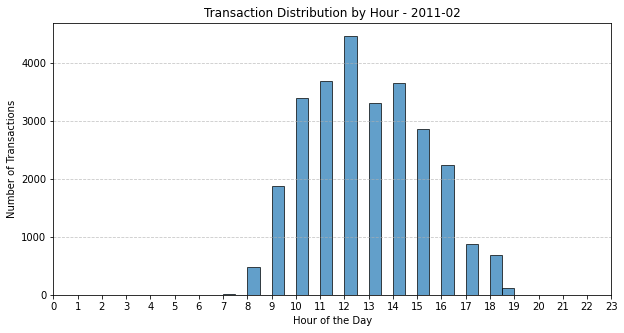

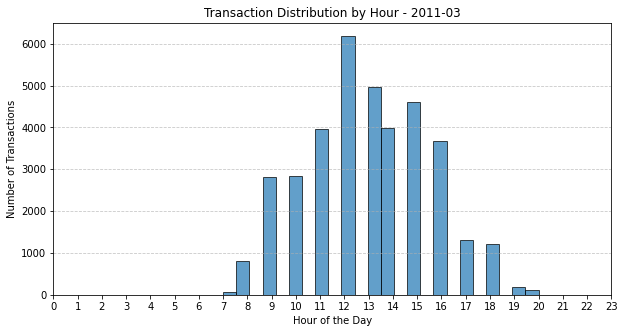

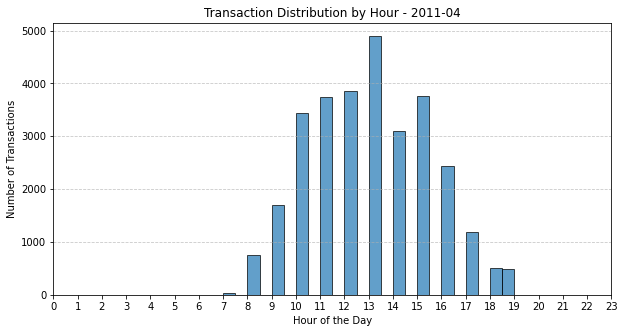

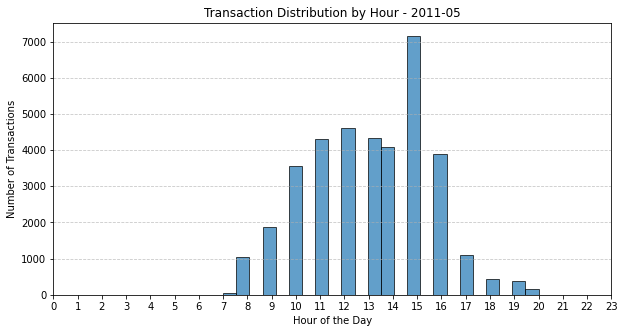

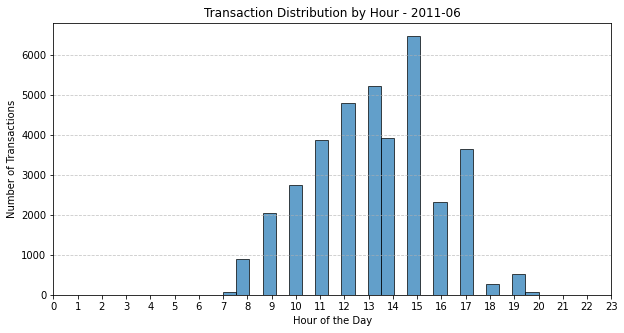

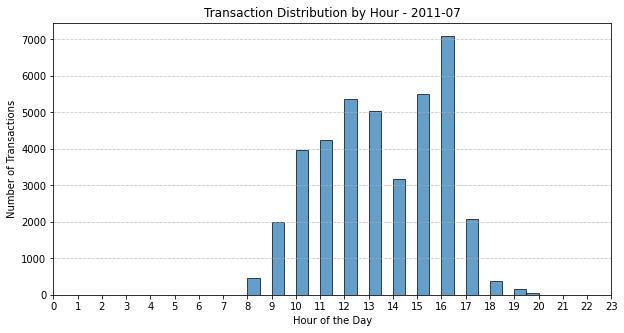

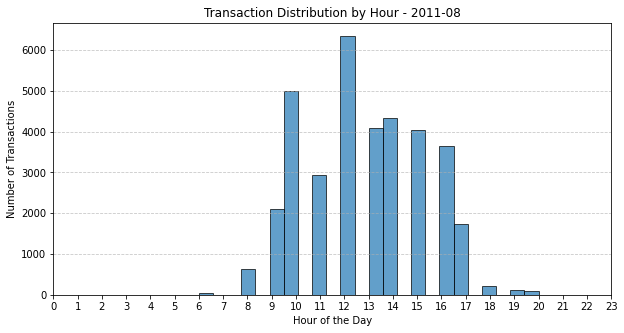

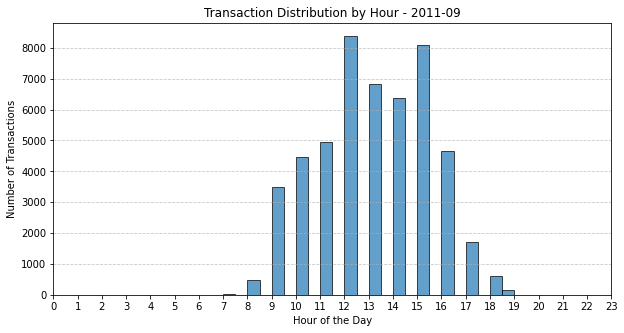

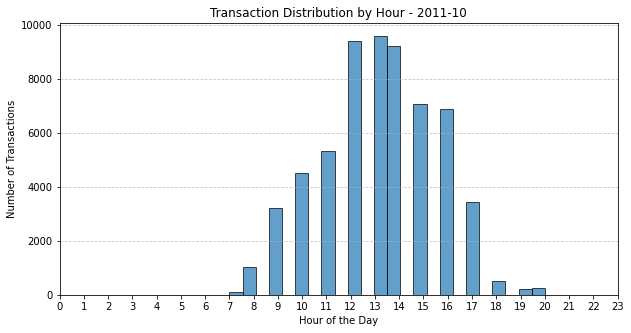

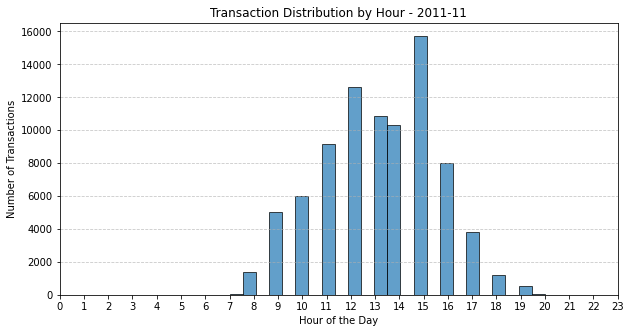

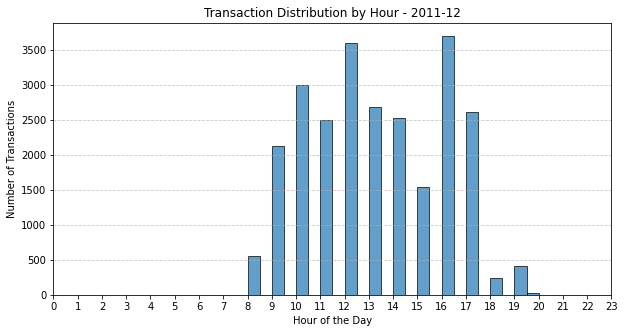

In [105]:
# Extract Year-Month and Hour
monthdate = dates.dt.to_period('M')
hourdate = dates.dt.hour
hour_month = pd.DataFrame({"Month": monthdate, "Hour": hourdate})

# Loop through each month and plot the histogram
for period, subset in hour_month.groupby("Month"):
    plt.figure(figsize=(10, 5))
    plt.hist(subset['Hour'], bins=24, edgecolor='black', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Transactions')
    plt.title(f'Transaction Distribution by Hour - {period}')
    plt.xticks(range(24))  # Show all 24 hours on x-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [119]:
# Let's Look at days the retail shop is doing transcation

keys = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
print(sorted(dates.dt.day_name().unique(), key=lambda x: keys[x]))

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']


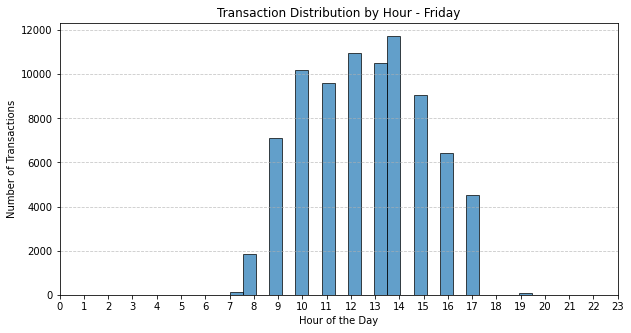

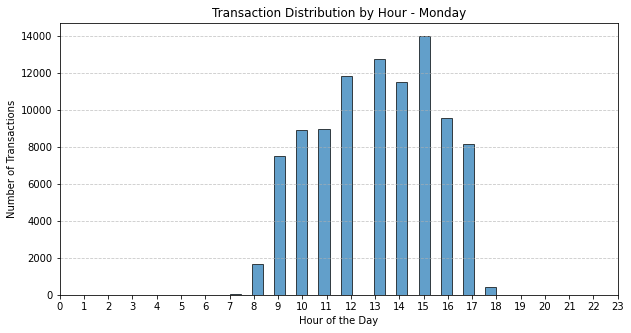

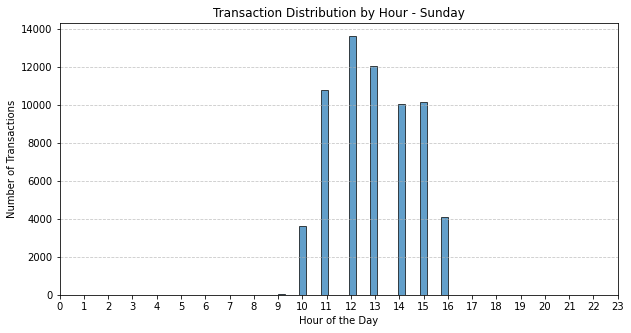

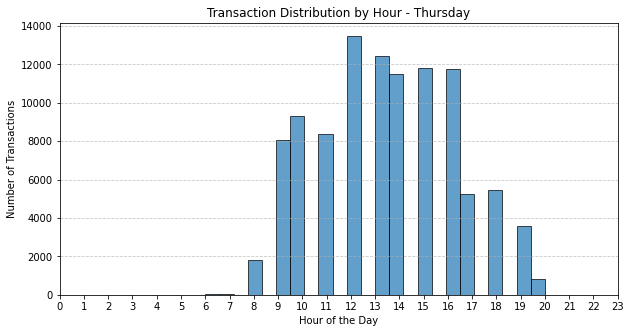

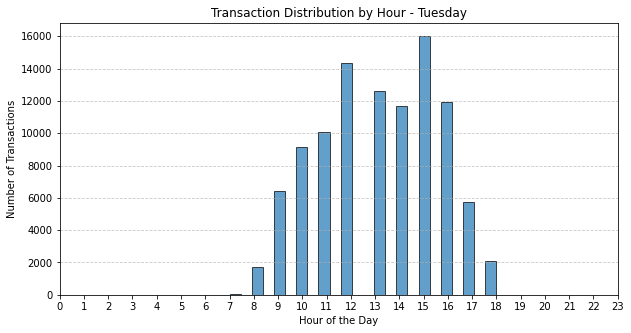

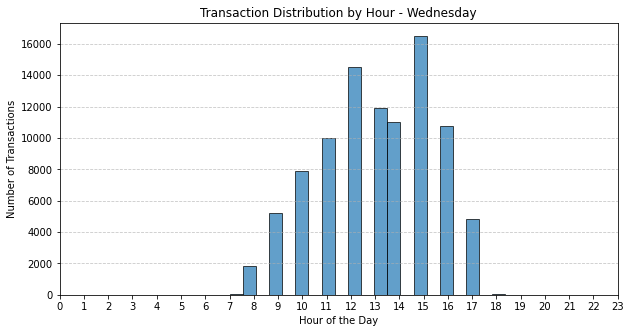

In [122]:
# Extract Year-Day and Hour
daydate = dates.dt.day_name()
hourdate = dates.dt.hour
hour_day = pd.DataFrame({"Day": daydate, "Hour": hourdate})

# Loop through each month and plot the histogram
for period, subset in hour_day.groupby("Day"):
    plt.figure(figsize=(10, 5))
    plt.hist(subset['Hour'], bins=24, edgecolor='black', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Transactions')
    plt.title(f'Transaction Distribution by Hour - {period}')
    plt.xticks(range(24))  # Show all 24 hours on x-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

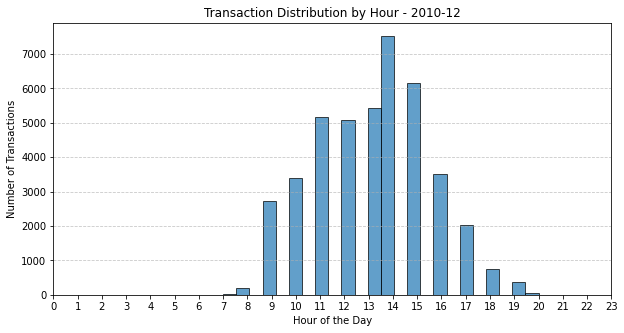

In [111]:
# Extract Year-Month and Hour
monthdate = dates.dt.to_period('M')
hourdate = dates.dt.hour
hour_month = pd.DataFrame({"Month": monthdate, "Hour": hourdate})

# Get unique months in sorted order
months = sorted(monthdate.unique())

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

def update(month):
    """Update function for animation."""
    ax.clear()  # Clear previous plot
    subset = hour_month[hour_month['Month'] == month]
    
    ax.hist(subset['Hour'], bins=24, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Transactions')
    ax.set_title(f'Transaction Distribution by Hour - {month}')
    ax.set_xticks(range(24))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=months, repeat=False)

# Display in Jupyter Notebook
HTML(ani.to_jshtml())

#### Now Let's look at description for each case and understand what transcation are they

In [187]:
# Kind of make sense as when there is transaction then quantity has to be there

print("Quantity == 0 and UnitPrice == 0")
print(df[(df["Quantity"] == 0) & (df["UnitPrice"] == 0)])
print("\nQuantity == 0 and UnitPrice > 0")
print(df[(df["Quantity"] == 0) & (df["UnitPrice"] > 0)])
print("\nQuantity == 0 and UnitPrice < 0")
print(df[(df["Quantity"] == 0) & (df["UnitPrice"] < 0)])

Quantity == 0 and UnitPrice == 0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

Quantity == 0 and UnitPrice > 0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

Quantity == 0 and UnitPrice < 0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [7]:
temp = df[(df["Quantity"] > 0) & (df["UnitPrice"] == 0)]

# from looks of it, this subset represent those which are given free or there are inventory adjustment
print(temp["Description"].unique())

[nan 'amazon' 'ROUND CAKE TIN VINTAGE GREEN'
 'CREAM SWEETHEART LETTER RACK' 'ZINC WILLIE WINKIE  CANDLE STICK'
 'BOX OF 24 COCKTAIL PARASOLS' 'DOORMAT ENGLISH ROSE '
 'DOORMAT 3 SMILEY CATS' 'GREEN REGENCY TEACUP AND SAUCER'
 'FRENCH BLUE METAL DOOR SIGN 7' 'FRENCH BLUE METAL DOOR SIGN 5'
 'FRENCH BLUE METAL DOOR SIGN 6' 'FRENCH BLUE METAL DOOR SIGN 4'
 'FRENCH BLUE METAL DOOR SIGN No' 'FRENCH BLUE METAL DOOR SIGN 8'
 'FRENCH BLUE METAL DOOR SIGN 1' 'RED KITCHEN SCALES'
 'IVORY KITCHEN SCALES' 'SET OF 6 SOLDIER SKITTLES'
 'CHILDS GARDEN TROWEL BLUE ' 'CHILDRENS GARDEN GLOVES BLUE'
 'PICNIC BASKET WICKER SMALL' 'PICNIC BASKET WICKER LARGE'
 'EMPIRE UNION JACK TV DINNER TRAY' 'TV DINNER TRAY VINTAGE PAISLEY'
 'SPACEBOY TV DINNER TRAY' 'TV DINNER TRAY DOLLY GIRL'
 'CHILDS GARDEN SPADE BLUE' 'CHILDS GARDEN RAKE BLUE'
 'WATERING CAN PINK BUNNY' 'ENAMEL FIRE BUCKET CREAM'
 'ENAMEL FLOWER JUG CREAM' 'AIRLINE BAG VINTAGE JET SET WHITE'
 'AIRLINE BAG VINTAGE JET SET BROWN' 'AIRLINE BAG VINTAGE

In [169]:
temp = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# real sales
print(temp["Description"].unique())

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "U" BLING KEY RING'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


In [174]:
# owner had to remove asset to adjust for bad debt

temp = df[(df["Quantity"] > 0) & (df["UnitPrice"] < 0)]
print(temp)
print("\n")
print(temp["Description"].unique())

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


['Adjust bad debt']


In [176]:
temp = df[(df["Quantity"] < 0) & (df["UnitPrice"] == 0)]

print(temp["Description"].unique())

[nan '?' 'check' 'damages' 'faulty' 'Dotcom sales'
 'reverse 21/5/10 adjustment' 'mouldy, thrown away.' 'counted'
 'Given away' 'Dotcom' 'label mix up' 'samples/damages' 'thrown away'
 'incorrectly made-thrown away.' 'showroom' 'MIA' 'Dotcom set'
 'wrongly sold as sets' 'Amazon sold sets' 'dotcom sold sets'
 'wrongly sold sets' '? sold as sets?' '?sold as sets?' 'Thrown away.'
 'damages/display' 'damaged stock' 'broken' 'throw away'
 'wrong barcode (22467)' 'wrong barcode' 'barcode problem' '?lost'
 "thrown away-can't sell." "thrown away-can't sell" 'damages?'
 're dotcom quick fix.' "Dotcom sold in 6's" 'sold in set?' 'cracked'
 'sold as 22467' 'Damaged' 'mystery! Only ever imported 1800'
 'MERCHANT CHANDLER CREDIT ERROR, STO' 'POSSIBLE DAMAGES OR LOST?'
 'damaged' 'DAMAGED' 'Display' 'Missing' 'wrong code?' 'wrong code'
 'adjust' 'crushed' 'damages/showroom etc' 'samples'
 'damages/credits from ASOS.' 'Not rcvd in 10/11/2010 delivery'
 'Thrown away-rusty' 'sold as set/6 by dotcom' 'w

From these above **product descriptions**, it looks like the transactions with **negative quantities and zero unit prices** are related to:  

**Possible Inferences:**  

1. **Damaged or Faulty Products** → `damages`, `faulty`, `broken`, `crushed`, `smashed`, `rusty thrown away`, `wet damaged`  
   - Likely items that were **damaged and written off** from inventory.  

2. **Returns & Adjustments** → `reverse adjustment`, `re-adjustment`, `reverse previous adjustment`, `adjustment`, `stock check`  
   - Might be **returns from customers** or **inventory corrections**.  

3. **Lost or Missing Items** → `missing`, `lost`, `??missing`, `lost in space`  
   - These might be **stock discrepancies**, **misplaced inventory**, or **theft/shrinkage**.  

4. **Incorrect Stock Entries** → `wrong barcode`, `wrongly marked`, `incorrectly credited`, `incorrect stock entry`  
   - Human errors in **inventory management** or **mislabeling** of products.  

5. **Dotcom & Amazon Adjustments** → `dotcom sales`, `Amazon sold sets`, `dotcom set`, `sold as set by dotcom`  
   - Maybe **e-commerce sales adjustments**, where products were miscounted, sold in wrong sets, or **pricing errors**.  

6. **Free Samples & Giveaways** → `Given away`, `Show Samples`, `Damages/samples`  
   - Could be **marketing giveaways**, **test samples**, or **customer replacements**.  

7. **Destroyed or Unsaleable Products** → `thrown away`, `mouldy, thrown away`, `wet pallet-thrown away`, `unsaleable, destroyed.`  
   - These seem to be **products discarded** due to quality issues.  

**Conclusion:**  

- Rows with **negative quantity and zero price** are likely **non-sales transactions**, meaning they **don’t represent actual sales** but rather **returns, stock adjustments, losses, or disposals**.  
- These transactions should probably be **excluded from sales analysis**, but they could be useful for **inventory management and loss prevention analysis**.  

In [191]:
temp = df[(df["Quantity"] < 0) & (df["UnitPrice"] > 0)]
print(temp.head())
print(len(temp))

print(temp["Description"].unique())

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
9288
['Discount' 'SET OF 3 COLOURED  FLYING DUCKS'
 'PLASTERS IN TIN CIRCUS PARADE ' ... 'SMALL SQUARE CUT GLASS CANDLESTICK'
 'HOUSE SHAPE PENCIL SHARPENER' 'PAPER CRAFT , LITTLE BIR

In [184]:
temp[temp["InvoiceNo"].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [190]:
# Here both are same as UnitPrice < 0 has none and UnitPrice == 0 has other stuff

df[df['Quantity'] < 0]['InvoiceNo'].str.startswith('C').value_counts()

InvoiceNo
True    9288
Name: count, dtype: int64

These are all starting with 'C', which mean these are credit notes most for returns and others for sample, discount, etc.  
That confirms that these transactions are credit notes (returns). In other words, these are cases where customers returned products, and the system recorded them with a negative quantity but retained the original unit price.

In [189]:
# again kind of make sense as -ve * -ve will create +ve and it will increase numbers

temp = df[(df["Quantity"] < 0) & (df["UnitPrice"] < 0)]
print(temp.head())

print(temp["Description"].unique())

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
[]


#### Let's study returns a bit

In [8]:
returns = df[(df["Quantity"] < 0) & (df["UnitPrice"] > 0)]

# let's filter it by removing alphabetic stock codes (refer below)
stock_series = returns["StockCode"]
stock_series = stock_series.astype(str)

# this not below one because
# returns[returns["StockCode"] == "BANK CHARGES"] thus it contains " " which escapes below
# only alphabet criteria
returns = returns[stock_series.str.contains(r'\d', na=False)]
# returns = returns[~stock_series.str.match(r'^[A-Za-z]+$', na=False)]

returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
# with below two cell, i can confidently use any first description as product description

k = returns.groupby("StockCode")["Description"].agg(lambda x: list(set(x))).reset_index()
check = k["Description"].apply(lambda x: len(x))
check.unique()

array([1, 2])

In [212]:
for i in list(k[check == 2]["Description"]):
    print(i)

['STRAWBERRY CERAMIC TRINKET POT', 'STRAWBERRY CERAMIC TRINKET BOX']
['ELEPHANT BIRTHDAY CARD ', 'ELEPHANT, BIRTHDAY CARD, ']
['JUMBO BAG SCANDINAVIAN BLUE PAISLEY', 'JUMBO BAG SCANDINAVIAN PAISLEY']
['SET 10 NIGHT OWL LIGHTS', 'SET 10 LIGHTS NIGHT OWL']
['POPCORN HOLDER', 'SMALL POPCORN HOLDER']
['DECORATION SITTING BUNNY', 'EASTER DECORATION SITTING BUNNY']
['LUNCH BAG SUKI DESIGN ', 'LUNCH BAG SUKI  DESIGN ']
['FAIRY TALE COTTAGE NIGHTLIGHT', 'FAIRY TALE COTTAGE NIGHT LIGHT']
['PACK OF 6 PANETTONE GIFT BOXES', 'PACK OF 6 PANNETONE GIFT BOXES']
['SWEETHEART 3 TIER CAKE STAND ', 'SWEETHEART CAKESTAND 3 TIER']
['PINK HANGING HEART T-LIGHT HOLDER', 'CANDLEHOLDER PINK HANGING HEART']
['PACK 3 BOXES CHRISTMAS PANNETONE', 'PACK 3 BOXES CHRISTMAS PANETTONE']
[' SET 2 TEA TOWELS I LOVE LONDON ', 'SET 2 TEA TOWELS I LOVE LONDON ']
['36 DOILIES DOLLY GIRL', 'SET OF 36 DOLLY GIRL PAPER DOILIES']
['SET OF 36 VINTAGE CHRISTMAS DOILIES', '36 DOILIES VINTAGE CHRISTMAS']
['VINTAGE  2 METRE FOLDING R

In [10]:
k = returns.groupby("StockCode")["Description"].agg(lambda x: list(set(x))).reset_index()


def stockcode_to_description(stockcodes):
    map_values = dict()
    for sc in stockcodes:
        map_values[sc] = k[k["StockCode"] == sc]["Description"].item()[0]
    return map_values

In [11]:
# Analyze the Most Returned Products

top10 = returns["StockCode"].value_counts().head(10)
desc = stockcode_to_description(top10.index)

top10.rename(index=desc)

StockCode
REGENCY CAKESTAND 3 TIER              181
JAM MAKING SET WITH JARS               87
SET OF 3 CAKE TINS PANTRY DESIGN       74
STRAWBERRY CERAMIC TRINKET POT         61
ROSES REGENCY TEACUP AND SAUCER        54
POPCORN HOLDER                         50
RECIPE BOX PANTRY YELLOW DESIGN        47
WOOD 2 DRAWER CABINET WHITE FINISH     45
JUMBO BAG RED RETROSPOT                44
LUNCH BAG RED RETROSPOT                44
Name: count, dtype: int64

In [73]:
# Countries with the Most Returns

dfstockcode_series = df["StockCode"].astype(str)
df_without_internals = df[dfstockcode_series.str.contains(r'\d', na=False)]

# removing U == 0 and Q > 0 U < 0 as above understood these are not real sales
df_filtered = df_without_internals[~(df_without_internals["UnitPrice"] == 0)]
df_filtered = df_filtered[~((df_filtered["Quantity"] > 0) & (df_filtered["UnitPrice"] < 0))]

total_transaction_countrywise = df_filtered["Country"].value_counts()
rc10 = returns["Country"].value_counts()

# let's look at return ratio cause total returns will be high due high transactions

# removing those with lower transactions
filtered_countries = total_transaction_countrywise[total_transaction_countrywise >= 50]

# Compute return ratio only for these countries
return_ratio = (rc10 / filtered_countries).fillna(0)
# fillna cause there are countries in transaction but not in rc10 (countries with no recorded returns)

# Sorting to see highest return ratios
return_ratio = return_ratio.sort_values(ascending=False)

print(return_ratio.head(10))

Country
USA          0.384880
Malta        0.113821
Japan        0.095775
Australia    0.058214
Italy        0.053640
Germany      0.048048
EIRE         0.035946
Poland       0.032738
Denmark      0.021333
Sweden       0.020595
Name: count, dtype: float64


In [54]:
# checking if my doing and pandas are doing same thing

rr = dict()
for country in rc10.index:
    rr[country] = rc10[country] / total_transaction_countrywise[country]
check = pd.Series(rr)

automate = (rc10 / total_transaction_countrywise).dropna()

# checking if index are same or not for above
print((check.index.sort_values() == automate.index.sort_values()).all())

# checking values are same or not for above
checkall = True
for country in check.index:
    if check[country] != automate[country]:
        checkall = False
        print(country, check[country], automate[country])
print("All are same values" if checkall == True else "There are dissimilarity")

True
All are same values


<Axes: title={'center': 'Returns Per Month'}, xlabel='YearMonth'>

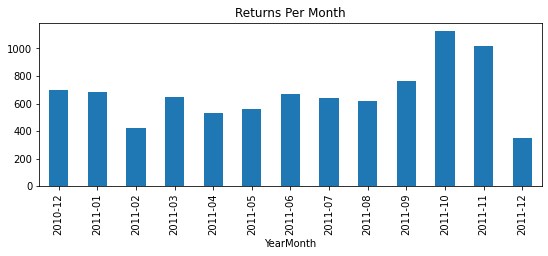

In [287]:
# if Certain Months Have More Returns

returns["YearMonth"] = returns['InvoiceDate'].dt.to_period('M')  # Extract Year-Month
returns.groupby("YearMonth")['Quantity'].count().plot(kind='bar', figsize=(9,3), title='Returns Per Month')

In [108]:
# Compare Returns vs. Total Sales by stockcode

total_sales = df_filtered[df_filtered["Quantity"] > 0].groupby("StockCode")['Quantity'].sum()
total_returns = returns.groupby('StockCode')['Quantity'].sum().abs()  # Use abs() to get positive values

return_rate = (total_returns / total_sales).fillna(0) * 100  # Convert to percentage
print(return_rate.sort_values(ascending=False).head(10))  # Show top 10 highest return rates

StockCode
20703     700.000000
21144     240.000000
79323P    200.000000
35400     160.000000
72815     133.333333
22034     120.000000
84750A    112.500000
79323B    100.000000
85047     100.000000
21655     100.000000
Name: Quantity, dtype: float64


In [122]:
# returns > sales; maybe previous year order sales which aren't recorded in data

print(total_returns[20703], total_sales[20703], "\n\n" + "=" * 50 + "\n")
print(df_filtered[df_filtered["StockCode"] == 20703])

7 1 


       InvoiceNo StockCode              Description  Quantity  \
18255    C537814     20703  BLUE PADDED SOFT MOBILE        -3   
155892    550033     20703  BLUE PADDED SOFT MOBILE         1   
170325   C551285     20703  BLUE PADDED SOFT MOBILE        -1   
211883   C555398     20703  BLUE PADDED SOFT MOBILE        -3   

               InvoiceDate  UnitPrice  CustomerID         Country  
18255  2010-12-08 13:43:00       4.25     12712.0         Germany  
155892 2011-04-14 11:45:00       4.25     15005.0  United Kingdom  
170325 2011-04-27 14:07:00       4.25     15005.0  United Kingdom  
211883 2011-06-02 17:30:00       4.25     17375.0  United Kingdom  


**Returns are inflated**

Looking at above data, i am like what??. But again looking at invoice number these returns invoice number (without 'c') are not
in my dataset. Thus i got that idea that these returns are from previous sales which aren't recorded in this dataset. Thus above
returns per stockcode won't make sense as sales records are missing. But this doesn't per countrywise or per month returns as
those data show amount of returns the shop has to process compared to total sales the shop is doing and having early return
won't change this idea.

In [133]:
# fixing by check if sold is returned or not

# Remove 'C' from InvoiceNo in returns to match with sales
returns["InvoiceNo_Clean"] = returns["InvoiceNo"].str.replace("C", "", regex=False)

# Get valid sales InvoiceNo
valid_sales_invoices = df_filtered[(df_filtered["Quantity"] > 0) & (df_filtered["UnitPrice"] > 0)]["InvoiceNo"]

# Keep only returns with a matching sale InvoiceNo
valid_returns = returns[returns["InvoiceNo_Clean"].isin(valid_sales_invoices)]

# Now, recalculate return rates
total_sales = df_filtered[df_filtered["Quantity"] > 0].groupby("StockCode")["Quantity"].sum()
total_returns = valid_returns.groupby("StockCode")["Quantity"].sum().abs()

return_rate = (total_returns / total_sales).fillna(0) * 100
print(return_rate.sort_values(ascending=False).head(10))  # Show top 10 highest return rates

StockCode
10002    0.0
84568    0.0
84580    0.0
84581    0.0
84584    0.0
84592    0.0
84593    0.0
84598    0.0
84600    0.0
84609    0.0
Name: Quantity, dtype: float64


In [134]:
valid_returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo_Clean


So all the sold are not returned, hmm 

#### Alphabetic StockCode Exploration 

In [236]:
# Analyze the Most Returned Products

top10 = returns["StockCode"].value_counts().head(10)
desc = stockcode_to_description(top10.index)

top10.rename(index=desc)

StockCode
Manual                               244
REGENCY CAKESTAND 3 TIER             181
POSTAGE                              126
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      74
SAMPLES                               61
STRAWBERRY CERAMIC TRINKET POT        61
ROSES REGENCY TEACUP AND SAUCER       54
POPCORN HOLDER                        50
Name: count, dtype: int64

In [239]:
df[df["StockCode"] == "POST"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France


In [240]:
df[df['StockCode'] == 'POST']['Description'].unique()

array(['POSTAGE', nan], dtype=object)

In [276]:
# all those stock code which only contain alphabets

df[df["StockCode"].str.match(r'^[A-Za-z]+$', na=False)]["Description"].unique()

array(['POSTAGE', 'Discount', 'DOTCOM POSTAGE', 'Manual', 'SAMPLES',
       'AMAZON FEE', nan, 'BOYS PARTY BAG', 'GIRLS PARTY BAG',
       'PADS TO MATCH ALL CUSHIONS', 'Adjust bad debt', 'CRUK Commission'],
      dtype=object)

In [277]:
temp = df[df["StockCode"].str.match(r'^[A-Za-z]+$', na=False)]
temp[temp["Description"].isin(['BOYS PARTY BAG', 'GIRLS PARTY BAG', 'PADS TO MATCH ALL CUSHIONS', 'CRUK Commission'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.290,NaN,United Kingdom
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.290,NaN,United Kingdom
97246,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.290,NaN,United Kingdom
112723,545897,DCGSSBOY,BOYS PARTY BAG,5,2011-03-07 17:22:00,3.290,NaN,United Kingdom
112724,545897,DCGSSGIRL,GIRLS PARTY BAG,5,2011-03-07 17:22:00,3.290,NaN,United Kingdom
116891,546306,DCGSSBOY,BOYS PARTY BAG,1,2011-03-10 16:16:00,3.290,NaN,United Kingdom
116892,546306,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-10 16:16:00,3.290,NaN,United Kingdom
128107,547249,DCGSSBOY,BOYS PARTY BAG,6,2011-03-22 09:27:00,3.290,NaN,United Kingdom
128108,547249,DCGSSGIRL,GIRLS PARTY BAG,17,2011-03-22 09:27:00,3.290,NaN,United Kingdom
128269,547250,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-22 09:30:00,3.290,NaN,United Kingdom


In [6]:
# trying to see there are stock code which contain more stuff like '-', etc

stock_series = df["StockCode"]
stock_series = stock_series.astype(str)
temp = df[~stock_series.str.contains(r'\d', na=False)]
temp["StockCode"].unique()

array(['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm',
       'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [267]:
temp[(temp["Quantity"] > 0) & (temp["UnitPrice"] > 0) & (temp["Description"] == "Adjust bad debt")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


**Key Takeaways**  

- These **are not typical retail returns** from customers.  
- Likely **internal corrections** for discounts, promotional samples, or system adjustments.  
- You may want to **filter them out** when analyzing customer returns.  

---

If **returns include items like "Discount", "Manuals", and "Samples"**, they **might not be actual customer product returns**. Instead, they could be **internal business adjustments**.  

**Possible Explanations for These Returns:**  

1. **Discount (`StockCode = 'D'`)**  
   - This might represent a **negative adjustment** for discounts applied to previous sales.  
   - Instead of directly reducing the price in invoices, the system might **record a negative transaction** to adjust the total revenue.  
   - **Not an actual returned product** but a bookkeeping adjustment.  

2. Manuals (`StockCode = 'M'`)**  
   - If instruction manuals are separately recorded in transactions, their return could mean:  
     - A product was **returned with its manual**.  
     - Manuals were **mistakenly added to stock** and later corrected.  
     - Internal inventory adjustments.  

3. **Samples (`StockCode = 'S'`)**  
   - These might be **free samples** that were:  
     - **Incorrectly recorded as sales** earlier, now being adjusted.  
     - Written off as **marketing expenses**.  
     - Used in a showroom, damaged, or no longer needed.  

---

**"POSTAGE" (StockCode: POST)** is **not an actual product** but rather a **shipping or handling charge** that is being sold as a line item.  

**Why is "POSTAGE" Being Sold?**

- **Quantity is Positive (+ve):** Indicates that this is **not a return** but a valid charge.  
- **Unit Price is Positive (+ve):** Suggests customers are **paying for it**, not returning it.  
- **Appears in Different Countries:** Suggests it's a standard shipping fee for international customers.  

**Inference**

- The store is **charging customers separately for shipping** and recording it as a product under `"POSTAGE"`.  
- This should **not** be considered a product sale when analyzing revenue or customer purchases.  

If it always says **"POSTAGE"**, then it's safe to **filter it out** from product analysis.  

In [270]:
temp = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [274]:
# thus my hypotheis that those internal business transaction only has NaN customerId for
# real sales which is not as we can see below and it makes sense as there will be some
# transaction where we loss the customerId

temp[temp["CustomerID"].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom


The reason i wanted my above hypothesis to be true as above there are stockcode with alphabets which
i presume to be internal business thing being seem like genuine product. Like boys party bags or girls party
bags. But they are low in quantity and rows so i can with confident remove those all rows where
stockcode has only alphabetic stock code as it won't change overall analysis scenario. The reason being
real sales has bad debt row which i don't want in my final calculation

Let's understand those business transactions

In [8]:
temp.groupby("StockCode")["Description"].agg(lambda x: list(set(x))).reset_index(name="Description")

,StockCode,Description
0,AMAZONFEE,[AMAZON FEE]
1,B,[Adjust bad debt]
2,BANK CHARGES,[Bank Charges]
3,CRUK,[CRUK Commission]
4,D,[Discount]
5,DCGSSBOY,[BOYS PARTY BAG]
6,DCGSSGIRL,[GIRLS PARTY BAG]
7,DOT,"[nan, DOTCOM POSTAGE]"
8,M,[Manual]
9,PADS,[PADS TO MATCH ALL CUSHIONS]


In [12]:
df[df["StockCode"] == "AMAZONFEE"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom


In [11]:
df[df["StockCode"] == "AMAZONFEE"][["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,34.000000,34.000000
mean,-0.882353,7324.784706
std,0.477665,4619.549649
min,-1.000000,1.000000
25%,-1.000000,5233.465000
50%,-1.000000,5909.875000
75%,-1.000000,8071.657500
max,1.000000,17836.460000


For the look of it, maybe amazonfee is the fee the retail store is paying to amazon for maybe showcasing or delivery

In [13]:
df[df["StockCode"] == "B"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [14]:
df[df["StockCode"] == "BANK CHARGES"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.000,15823.0,United Kingdom
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.380,NaN,United Kingdom
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.920,NaN,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.000,15939.0,United Kingdom
64573,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.150,NaN,United Kingdom
90558,C544049,BANK CHARGES,Bank Charges,-1,2011-02-15 12:39:00,566.370,NaN,United Kingdom
96675,C544575,BANK CHARGES,Bank Charges,-1,2011-02-21 13:58:00,134.760,NaN,United Kingdom
96676,C544576,BANK CHARGES,Bank Charges,-1,2011-02-21 14:01:00,149.160,NaN,United Kingdom
96715,C544584,BANK CHARGES,Bank Charges,-1,2011-02-21 14:52:00,109.840,NaN,United Kingdom
112233,C545887,BANK CHARGES,Bank Charges,-1,2011-03-07 15:54:00,326.680,NaN,United Kingdom


In [15]:
df[df["StockCode"] == "CRUK"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom
361603,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom
390002,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom
416464,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom


*CRUK Commission* is commission the store is paying to CRUK (maybe Cancer Research UK). This amount is a portion of revenue they
generated. If it is Caner Research UK then it is like a charity they are paying. Look all the customerID are same.

And from the looks of it, they started paying this from 2011-08 to end.

In [16]:
df[df["StockCode"] == "D"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [17]:
df[df["StockCode"] == "D"][["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,77.000000,77.000000
mean,-15.506494,72.484545
std,86.557043,219.271071
min,-720.000000,0.010000
25%,-1.000000,13.880000
50%,-1.000000,22.970000
75%,-1.000000,57.600000
max,-1.000000,1867.860000


So yeah whatever discount they are doing, they are subtracting from main revenue

In [25]:
postage = df[df["StockCode"] == "DOT"]
postage

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


In [26]:
postage[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,710.000000,710.000000
mean,2.404225,290.495859
std,37.491983,355.392120
min,-1.000000,0.000000
25%,1.000000,131.270000
50%,1.000000,184.940000
75%,1.000000,264.487500
max,1000.000000,4505.170000


In [27]:
postage[postage["Quantity"] == -1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
75004,C542540,DOT,DOTCOM POSTAGE,-1,2011-01-28 14:20:00,3.29,NaN,United Kingdom


In [29]:
postage[postage["InvoiceNo"] == 542540]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [36]:
post = df[df["StockCode"] == "POST"]
post

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany


In [37]:
post[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,1256.000000,1256.000000
mean,5.058121,36.933495
std,47.440218,326.109801
min,-4.000000,0.000000
25%,1.000000,18.000000
50%,2.000000,18.000000
75%,3.000000,18.000000
max,1000.000000,8142.750000


In [41]:
postpaying = post[post["Quantity"] < 0]
postpaying

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
13052,C537414,POST,POSTAGE,-1,2010-12-06 15:09:00,4.41,16861.0,United Kingdom
32383,C539063,POST,POSTAGE,-1,2010-12-15 16:50:00,12.34,15107.0,United Kingdom
32402,C539073,POST,POSTAGE,-1,2010-12-15 17:08:00,3.50,12971.0,United Kingdom
34591,C539409,POST,POSTAGE,-1,2010-12-17 12:58:00,18.00,12720.0,Germany
39905,C539712,POST,POSTAGE,-1,2010-12-21 12:40:00,5.75,15602.0,United Kingdom
...,...,...,...,...,...,...,...,...
507999,C579192,POST,POSTAGE,-4,2011-11-28 15:43:00,18.00,12657.0,France
509585,C579366,POST,POSTAGE,-1,2011-11-29 11:56:00,9.72,14205.0,United Kingdom
513076,C579532,POST,POSTAGE,-1,2011-11-30 09:21:00,18.00,12494.0,France
519704,C580161,POST,POSTAGE,-2,2011-12-02 10:49:00,18.00,12700.0,France


In [54]:
invoiceno = postpaying["InvoiceNo"].str.replace("C", "").apply(lambda x: int(x)).unique()
post[post["InvoiceNo"].isin(invoiceno)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


So we are charging postage from current customer and paying postage previous transactions which are not in dataset.